In [0]:
import tensorflow as tf



In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


In [4]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [0]:
y_train_onehot_encoded=np_utils.to_categorical(y_train,10)
y_test_one_hot_encoded=np_utils.to_categorical(y_test,10)


In [7]:
y_train_onehot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_test_one_hot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [9]:
y_train_onehot_encoded.shape[1]

10

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape


(50000, 1)

In [12]:
x_test.shape


(10000, 32, 32, 3)

In [13]:
y_test.shape

(10000, 1)

In [0]:
num_classes=10
img_size=x_train.shape[1]
num_channels= x_train.shape[3]
img_size_flat=x_train.shape[1]*x_train.shape[2]*x_train.shape[3]

In [15]:
print("num_classes:",num_classes)
print("num_channels:",num_channels)
print("img_size:",img_size)
print("img_size_flat:",img_size_flat)

num_classes: 10
num_channels: 3
img_size: 32
img_size_flat: 3072


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [17]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(labels[0])

airplane


In [18]:
num_pixels=x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
print(num_pixels)

3072


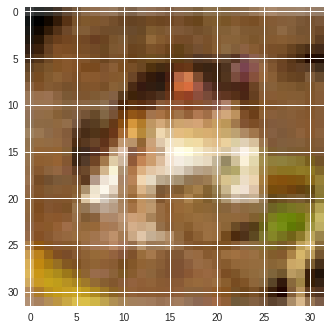

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])


In [20]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [21]:
print(labels[int(y_train[0])])
print(int(y_train[0]))
ps=y_train
print(ps.shape)

frog
6
(50000, 1)


In [0]:
#labels_train=tf.one_hot(y_train, depth=10,
        #   on_value=1.0, off_value=0.0,
         #              axis=-1)
#labels_train=tf.reshape(labels_train,shape=[50000,10])
#print(labels_train.shape)
#labels_train=tf.cast(labels_train,tf.int32)
#print(labels_train)
#print(len(y_train))

In [23]:
"""
indices = [0, 2, -1, 1]
depth = 3
print(tf.one_hot(indices, depth,
           on_value=1.0, off_value=0.0,
           axis=-1)) 
"""

'\nindices = [0, 2, -1, 1]\ndepth = 3\nprint(tf.one_hot(indices, depth,\n           on_value=1.0, off_value=0.0,\n           axis=-1)) \n'

In [0]:
#print(labels_train)

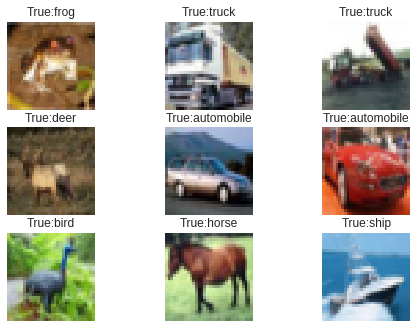

In [25]:
fig=plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  a=labels[int(y_train[i])]
  plt.title("True:{}".format(a))
  plt.xticks([])
  plt.yticks([])
 

In [26]:
print("labels:{0}".format(labels[int(y_train[0])]))

labels:frog


In [0]:
def plot_images(images,cls_true,cls_pred=None):
  assert len(images)==len(cls_true)==9
  fig,axes=plt.subplots(3,3)
  fig.subplots_adjust(hspace=0.3,wspace=0.3)
  
  for i,ax in enumerate(axes.flat):
    ax.imshow(images[i,:,:,:],interpolation='nearest')
    cls_true_name=labels[int(cls_true[i])]
    
    if cls_pred is None:
      xlabel="True:{0}".format(cls_true_name)
      
    else:
      class_pred_name=labels[int(cls_pred[i])]
      xlabel="True:{0} predicted:{1}".format(cls_true_name,cls_pred_name)
       
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])
  plt.show()

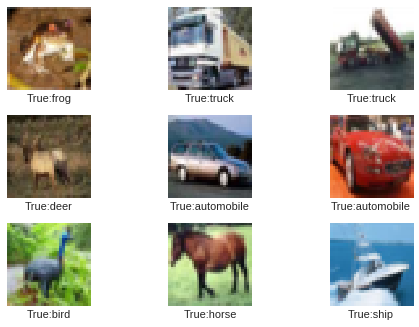

In [28]:
images=x_train[0:9]
cls_true=y_train[0:9]
plot_images(images=images,cls_true=cls_true)

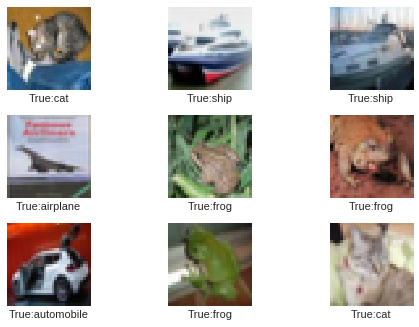

In [29]:
images=x_test[0:9]
cls_true=y_test[0:9]
plot_images(images=images,cls_true=cls_true)

In [0]:
#placeholders
x=tf.placeholder(tf.float32,shape=[None,img_size,img_size,num_channels],name='x')
x_image=tf.reshape(x,[-1,img_size,img_size,num_channels])
y_true=tf.placeholder(tf.float32,shape=[None,num_classes],name='y_true')
#argmax
y_true_cls=tf.argmax(y_true,axis=1)

In [0]:
#preprocessing
x_train=x_train/255
x_test=x_test/255

In [0]:
def new_weights(shape):
  return tf.Variable(tf.truncated_normal(shape,stddev=0.05,dtype=tf.float32))

def new_biases(length):
  return tf.Variable(tf.constant(0.05,shape=[length]))


In [0]:
#convolution layer 1
filter_size1=3
num_filters1=64
#convolution layer 2
filter_size2=3
num_filters2=128
#convolution layer 3
filter_size3=5
num_filters3=256
#convolution layer 4
filter_size4=5
num_filters4=512
#fully_connected layer1
fc_layer_size1=128
#fully_connected layer1
fc_layer_size2=256
#fully_connected layer1
fc_layer_size3=512
#fully_connected layer1
fc_layer_size4=1024


In [0]:
def new_conv_layer(input,num_input_channels,filter_size,num_filters,use_pooling=True):#,dropout_layer=False):
  #shape of filters
  shape=[filter_size,filter_size,num_input_channels,num_filters]
  
  weights=new_weights(shape)
  biases=new_biases(length=num_filters)
  
  layer=tf.nn.conv2d(input=input,filter=weights,strides=[1,1,1,1],padding='SAME')
  layer=layer+biases
  
  layer=tf.nn.relu(layer)

  if use_pooling:
    layer=tf.nn.max_pool(value=layer,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    
  #if dropout_layer:
   # layer=tf.nn.dropout(layer,keep_prob=0.25)
    
  print(layer.get_shape())  
    
  return layer,weights

In [0]:
def flatten_layer(layer):
  layer_shape=layer.get_shape()
  
  #layer_shape=[num_input_chanels,img_height,img_width,num_output_channels]
  
  print("layer_shape=",layer_shape)
  
  #num_fateures=img_height*img_width*num_output_channels 
  #using tensor flow fn to calculate this
    
  num_features=layer_shape[1:4].num_elements()
  
  layer_flat=tf.reshape(layer,[-1,num_features])
  
  print("num_features=",num_features)
  
  return layer_flat,num_features

In [0]:
def fc_layer(input,num_inputs,num_outputs,use_relu=True):
  
  weights=new_weights([num_inputs,num_outputs])
  biases=new_biases(length=num_outputs)
  
  layer=tf.matmul(input,weights)+biases
  
  if use_relu:
    layer=tf.nn.relu(layer)
    
  return layer

In [37]:
y_true_cls.shape

TensorShape([Dimension(None)])

In [38]:
#conv1
layer_conv1,weights_conv1 =new_conv_layer(input=x_image, num_input_channels=num_channels,filter_size=filter_size1,num_filters=num_filters1,use_pooling=False)


Instructions for updating:
Colocations handled automatically by placer.
(?, 32, 32, 64)


In [39]:
print("layer_conv1=",layer_conv1)
print("weights_conv1=",weights_conv1)

layer_conv1= Tensor("Relu:0", shape=(?, 32, 32, 64), dtype=float32)
weights_conv1= <tf.Variable 'Variable:0' shape=(3, 3, 3, 64) dtype=float32_ref>


In [40]:
#conv2
layer_conv2,weights_conv2= new_conv_layer(input=layer_conv1, num_input_channels=num_filters1, filter_size=filter_size2, num_filters=num_filters2, use_pooling=True)


(?, 16, 16, 128)


In [41]:
print("layer_conv2=",layer_conv2)
print("weights_conv2=",weights_conv2)

layer_conv2= Tensor("MaxPool:0", shape=(?, 16, 16, 128), dtype=float32)
weights_conv2= <tf.Variable 'Variable_2:0' shape=(3, 3, 64, 128) dtype=float32_ref>


In [0]:
#conv3
#layer_conv3,weights_conv3= new_conv_layer(input=layer_conv2, num_input_channels=num_filters2, filter_size=filter_size3, num_filters=num_filters3, use_pooling=True)


In [0]:
#print("layer_conv3=",layer_conv3)
#print("weights_conv3=",weights_conv3)

In [43]:
#conv4
layer_conv4,weights_conv4= new_conv_layer(input=layer_conv2, num_input_channels=num_filters2, filter_size=filter_size4, num_filters=num_filters4, use_pooling=True)

(?, 8, 8, 512)


In [44]:
print("layer_conv4=",layer_conv4)
print("weights_conv4=",weights_conv4)

layer_conv4= Tensor("MaxPool_1:0", shape=(?, 8, 8, 512), dtype=float32)
weights_conv4= <tf.Variable 'Variable_4:0' shape=(5, 5, 128, 512) dtype=float32_ref>


In [45]:
#layer_flat, num_features=flatten_layer(layer_conv2)
layer_flat, num_features=flatten_layer(layer_conv4)

layer_shape= (?, 8, 8, 512)
num_features= 32768


In [46]:
print("layer_flat=",layer_flat)
print("num_features=",num_features)

layer_flat= Tensor("Reshape_1:0", shape=(?, 32768), dtype=float32)
num_features= 32768


In [0]:
#fc1
layer_fc1=fc_layer(input=layer_flat,num_inputs=num_features,num_outputs=fc_layer_size1,use_relu=True)

In [48]:
print("layer_fc1=",layer_fc1)

layer_fc1= Tensor("Relu_3:0", shape=(?, 128), dtype=float32)


In [0]:
#fc2
layer_fc2=fc_layer(input=layer_fc1,num_inputs=fc_layer_size1,num_outputs=fc_layer_size2, use_relu=True)

In [50]:
print("layer_fc2=",layer_fc2)

layer_fc2= Tensor("Relu_4:0", shape=(?, 256), dtype=float32)


In [0]:
#fc3
#layer_fc3=fc_layer(input=layer_fc2, num_inputs=fc_layer_size2, num_outputs=fc_layer_size3, use_relu=True)

In [0]:
#print("layer_fc3=",layer_fc3)

In [0]:
#fc4
layer_fc4=fc_layer(input=layer_fc2, num_inputs=fc_layer_size2, num_outputs=fc_layer_size4, use_relu=True)

In [54]:
print("layer_fc4=",layer_fc4)

layer_fc4= Tensor("Relu_5:0", shape=(?, 1024), dtype=float32)


In [0]:
#final lyaer fuly connected one
layer_fc5=fc_layer(input=layer_fc4, num_inputs=fc_layer_size4, num_outputs=num_classes, use_relu=False)

In [56]:
print("layer_fc5=",layer_fc5)

layer_fc5= Tensor("add_6:0", shape=(?, 10), dtype=float32)


In [0]:
y_pred=tf.nn.softmax(layer_fc5)

In [0]:
y_pred_cls=tf.argmax(y_pred,axis=1)


In [59]:
#cross_entropy
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
#loss
cost=tf.reduce_mean(cross_entropy)

In [0]:
#optimizer
#optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [0]:
#correct_prediction
correct_prediction=tf.equal(y_pred_cls,y_true_cls)

In [0]:
#accuracy
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [0]:
sess=tf.Session()
init=sess.run(tf.global_variables_initializer())

In [0]:

train_batch_size=69

In [0]:
import numpy as np
def random_batch():
    # Number of images in the training-set.
    num_images = len(x_train)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=train_batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = x_train[idx, :, :, :]
    y_batch = y_train_onehot_encoded[idx, :]

    return x_batch, y_batch

In [0]:
#total_iterations = 0

def optimize(num_iterations):
  #global total_iterations
  #for i in range(total_iterations, total_iterations+num_iterations):
   for i in range(num_iterations):
      x_true_batch,y_true_batch=random_batch()
      feed_dict_train={x_image:x_true_batch,y_true:y_true_batch}
      sess.run(optimizer,feed_dict=feed_dict_train)
      loss=sess.run(cost,feed_dict=feed_dict_train)
      acc=sess.run(accuracy,feed_dict=feed_dict_train)
      if(i%100==0):
        print("optimization iteration:{0:>6}\t training accuracy:{1:>6.1%}\t loss:{2}".format(i+1,acc,loss))
        #print("loss:{}".format(cost))
  #total_iterations += num_iterations

In [0]:
optimize(5000)

optimization iteration:     1	 training accuracy: 15.9%	 loss:2.2913269996643066
optimization iteration:   101	 training accuracy: 24.6%	 loss:2.2185285091400146
optimization iteration:   201	 training accuracy: 36.2%	 loss:2.126443386077881
optimization iteration:   301	 training accuracy: 34.8%	 loss:2.078035593032837
optimization iteration:   401	 training accuracy: 33.3%	 loss:2.1134819984436035
optimization iteration:   501	 training accuracy: 36.2%	 loss:2.0856149196624756


In [0]:
batch_size=256

def print_test_accuray(images,labels,cls_true):
    num_images=len(images)
    cls_pred=np.zeros(shape=num_images,dtype=np.int)
    #next batch sarting images
    i=0
    while(i<num_images):
        #ending of next batch images
        j=min(i+batch_size,num_images)
        feed_dict1={x:images[i:j:],y_true:labels[i:j:]}
        cls_pred[i:j]=sess.run(y_pred_cls,feed_dict=feed_dict1)
        #set start index of next batch =end of prev batch
        i=j
    
    correct=(y_pred_cls==cls_true)
    incorrect=(y_pred_cls!=cls_true)
    correct_sum=correct.sum()
    acc=float(correct_sum)/num_images
    
    print("accuracy on test set:{0:.1%}  ({1}/{2})".format(acc,coorect_sum,num_images)) 
    print("correct prediction::")
    plot_examples(cls_pred=cls_pred,uwant=correct)
    print("incorrect prediction::")
    plot_examples(cls_pred=cls_pred,uwant=incorrect)

In [0]:
def plot_examples(cls_pred,uwant):
    images=x_test[uwant]
    cls_pred=cls_pred[uwant]
    cls_true=y_test[uwant]
    
    plot_images(images=images[0:9],
                cls_true=y_test[0:9],
               cs_pred=cls_pred[0:9])

In [0]:
#def predict_cls_test():
 #   return pred_cls(images=x_test,labels=y_test_onehot_encoded,cls_true=y_test)

In [0]:
pint_test_accuracy(images=x_test,labels=y_test_one_hot_encoded,cls_true=y_test)

In [0]:
#plot weights
import math
def plot_conv_weights(weights, input_channel=0):
   
    w = sess.run(weights)

    # lowest and highest values for the weights.to corect colour intensity across images so they can be compared
  
    w_min = np.min(w)
    w_max = np.max(w)

    # No. of filters used in the convlayer
    num_filters = w.shape[3]

    # Number of grids to plot
    # Rounded-up, square-root of the number of filters
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights
        if i<num_filters:
            # Get the weights for the i filter of the input channel
           
            img = w[:, :, input_channel, i]

            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest',cmap='gray')# cmap='seismic')
        
        ax.set_xticks([])
        ax.set_yticks([])
   
    plt.show()

In [0]:
#plot convlayer
def plot_conv_layer(layer, image):
   
    feed_dict0 = {x: [image]}

    values = sess.run(layer, feed_dict=feed_dict0)

    num_filters = values.shape[3]

    num_grids = math.ceil(math.sqrt(num_filters))
   
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = values[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='jet')
     
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [0]:
plot_conv_weights(weights=weights_conv1)

In [0]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='jet')
    plt.axis('off')

    plt.show()

In [0]:
image1 = x_test[0]
plot_image(image1)

In [0]:
plot_conv_layer(layer=layer_conv1, image=image1)

In [0]:
#y_pred_proba=estimator.predict_proba(x_test)

In [0]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

print(classification_report(y_true=y_test,y_pred=cls_pred))
print(confusion_matrix(y_true=y_test,y_pred=cls_pred))
print(accuracy_score(y_true=y_test,y_pred=cls_pred))
print(f1_score(y_true=y_test,y_pred=cls_pred))